In [1]:
import numpy as np

from astropy.io import fits
from astropy import units as u

%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
## Plot
import matplotlib.pyplot as plt
from matplotlib import ticker, patches
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, LogFormatter
from matplotlib.colors import LogNorm
from matplotlib.collections import LineCollection

from ss_default_plot import *
from matplotlib import cm, ticker, patches
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse

fig_width_pt = 1024                    # Suited for LaTeX
inches_per_pt = 1.0/72.27              # Convert pt to inch
golden_mean = (math.sqrt(5)-1.0)/2.0   # Aesthetic ratio
#golden_mean = 1.
fig_width = fig_width_pt*inches_per_pt # width in inches
fig_height = fig_width*golden_mean     # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.linewidth' : 2,
          'legend.fontsize': 14,
          'text.usetex'    : False,
          'figure.figsize' : fig_size}
dotseq = [2, 2]
dashdotseq = [7, 4, 3, 4]
plt.rcParams.update(params)

In [2]:
import summary_stat

In [3]:
# read the EL-COSMOS catalog
cmc = fits.open('/Volumes/ThunderBay4-40TB/CosmoTreasure/mock/cosmos/cmc_lam/combinedcatalog_flux_SNR-cos_full_phy_fz-a0.20_OI15config_added-Re.fits')[1].data
    
# specify a selection in (g, g-r, r-i): here is modified version of Takada+(2014) (see the previous SSP document)
select_g  = (cmc['g_hsc'] > 23.2) & (cmc['g_hsc'] < 24.2)
select_gr = ((cmc['g_hsc']-cmc['r_hsc'] > 0.05) 
                 & (cmc['g_hsc']-cmc['r_hsc'] < 0.35))
select_ri = ((cmc['g_hsc'] > 23.6) 
                 & (cmc['r_hsc']-cmc['i_hsc'] > 0.3))
select_g_gr = select_g & select_gr
cut_target  = select_g_gr & ~select_ri
    
numELGs, pfs_mT14_sn6, fac_eff = summary_stat.calc_target_stats(cmc, cut_target, snr_threshold=6, verbose=1)

zbins_T14 = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 2.0, 2.4])
dndz_mT14 = summary_stat.calc_dndz(pfs_mT14_sn6, fac_eff, zbins_T14, verbose=1)

***** Target selection statistics summary *****

Your threthold: SNR_PFS_OII > 6

(1) # of fibers for which a galaxy is assigned: 4410
# of fibers which miss a galaxy assignment: 378
efficiency = (1)/(# of total fibers, 4788): 92.11%

(2) # of target galaxies per FoV: 8530
completeness = (1)/(2): 51.70%

(3) # of detectable PFS ELGs per two visits per FoV: 3052
success rate = (3)/(1) = 69.21%

***********************************************

dn/dz: 
#0, 0.6 <= z < 0.8, Vs[(Gpc/h)^3] = 0.550, Ng/FoV = 95, ng[10^-4(h/Mpc)^3] = 2.304
#1, 0.8 <= z < 1.0, Vs[(Gpc/h)^3] = 0.723, Ng/FoV = 390, ng[10^-4(h/Mpc)^3] = 7.192
#2, 1.0 <= z < 1.2, Vs[(Gpc/h)^3] = 0.864, Ng/FoV = 387, ng[10^-4(h/Mpc)^3] = 5.972
#3, 1.2 <= z < 1.4, Vs[(Gpc/h)^3] = 0.973, Ng/FoV = 730, ng[10^-4(h/Mpc)^3] = 10.008
#4, 1.4 <= z < 1.6, Vs[(Gpc/h)^3] = 1.052, Ng/FoV = 489, ng[10^-4(h/Mpc)^3] = 6.195
#5, 1.6 <= z < 2.0, Vs[(Gpc/h)^3] = 2.254, Ng/FoV = 711, ng[10^-4(h/Mpc)^3] = 4.206
#6, 2.0 <= z < 2.4, Vs[(Gpc/h)^3] = 2.345,

In [19]:
# can try a different criteria

# For example, DESI FDR
snr_threshold = 10E-17 #[erg/s/cm2]
snr_label = 'flux_OII'
zlow  = 0.
zhigh = 1.6

select_r  = cmc['r_hsc'] < 23.4
select_A  = cmc['r_hsc'] - cmc['z_hsc'] > 0.3
select_rz  = cmc['r_hsc'] - cmc['z_hsc'] < 1.6
select_B  = cmc['g_hsc'] - cmc['r_hsc'] < 1.5*(cmc['r_hsc'] - cmc['z_hsc']) - 0.15
select_C  = cmc['g_hsc'] - cmc['r_hsc'] < 1.6 - 1.2*(cmc['r_hsc'] - cmc['z_hsc'])

select_FDRlike = select_r & select_A
select_FDRlike &= select_rz
select_FDRlike &= select_B
select_FDRlike &= select_C

dum_numELGs, dum_cat, fac_eff = summary_stat.calc_target_stats(cmc, select_FDRlike, snr_threshold, snr_label, zlow, zhigh, verbose=1)

zbins = np.linspace(0., 1.6, 16)
dndz_dum = summary_stat.calc_dndz(dum_cat, fac_eff, zbins, verbose=1)

***** Target selection statistics summary *****

Your threthold: flux_OII > 1e-16

(1) # of fibers for which a galaxy is assigned: 4272
# of fibers which miss a galaxy assignment: 516
efficiency = (1)/(# of total fibers, 4788): 89.24%

(2) # of target galaxies per FoV: 7616
completeness = (1)/(2): 56.09%

(3) # of detectable PFS ELGs per two visits per FoV: 3400
success rate = (3)/(1) = 79.59%

***********************************************

dn/dz: 
#0, 0.0 <= z < 0.1, Vs[(Gpc/h)^3] = 0.005, Ng/FoV = 121, ng[10^-4(h/Mpc)^3] = 358.127
#1, 0.1 <= z < 0.2, Vs[(Gpc/h)^3] = 0.029, Ng/FoV = 124, ng[10^-4(h/Mpc)^3] = 57.488
#2, 0.2 <= z < 0.3, Vs[(Gpc/h)^3] = 0.070, Ng/FoV = 80, ng[10^-4(h/Mpc)^3] = 15.229
#3, 0.3 <= z < 0.4, Vs[(Gpc/h)^3] = 0.122, Ng/FoV = 47, ng[10^-4(h/Mpc)^3] = 5.156
#4, 0.4 <= z < 0.5, Vs[(Gpc/h)^3] = 0.178, Ng/FoV = 1, ng[10^-4(h/Mpc)^3] = 0.075
#5, 0.5 <= z < 0.6, Vs[(Gpc/h)^3] = 0.235, Ng/FoV = 155, ng[10^-4(h/Mpc)^3] = 8.794
#6, 0.6 <= z < 0.7, Vs[(Gpc/h)^3] = 0.290

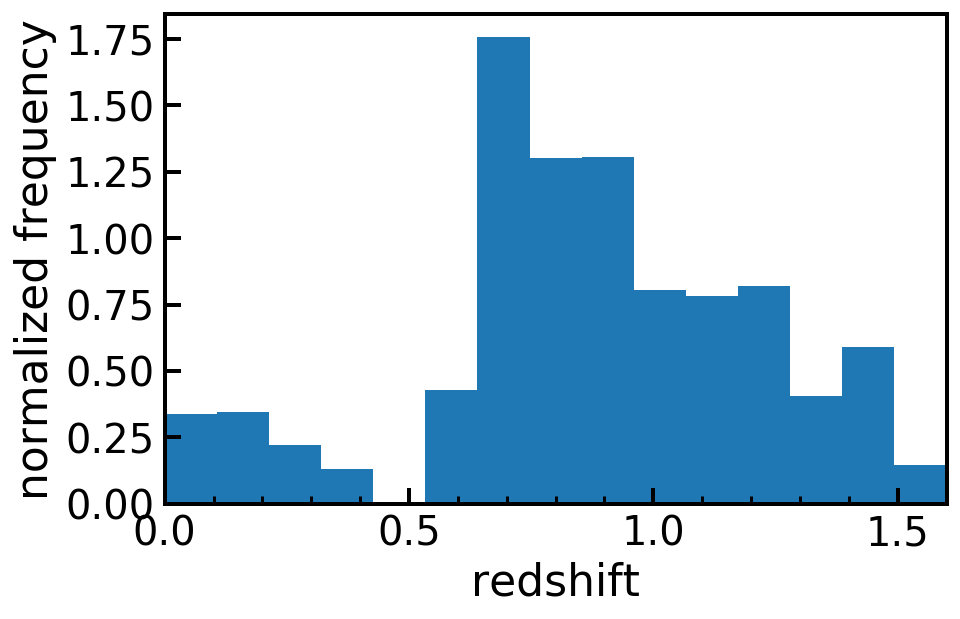

In [20]:
fig = plt.figure(1)
plt.clf()
## Range
plt.subplots_adjust(left=0.075,bottom=0.13,top=0.98,right=0.98)
ax = plt.axes([0.18,0.2,0.76,0.71])
ax = fig.add_subplot(111) 
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(0,1.6)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax.set_ylim(2E-5,100)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
#ax.yaxis.set_major_locator(MultipleLocator(500.))
#ax.yaxis.set_minor_locator(MultipleLocator(100.))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'redshift', fontsize=22)
ax.set_ylabel(r'normalized frequency', fontsize=22)

#ax.set_title(r'zCOSMOS', fontsize=17)
#ax.text(1.2, 0.16, '33/87=37.9%', fontsize=15)

dz=0.1
ax.hist(dum_cat['z_photo'], zbins, weights=dz*np.ones(shape=(dum_cat.shape[0])), density=True)

#axleg = ax.legend(loc='upper left', numpoints=1, 
#                  ncol=1, fontsize=18, borderaxespad=0.2)
#axleg.draw_frame(False)

#plt.savefig(HOMEDIR+'Desktop/PFS_spectrum.pdf')
plt.show()